# Data Analytics and Regression
 Today's goals:
 - Introduce the basic idea of regression
 - Perform linear regression using closed form solution
 - Perform regression using gradient descent

# Data analytics
- At the heart of engineering and science is data analytics
- A mathematical model represents our believe on how a system works or how factors are related
    - Ideal gas law, mass action kinetics, heat transfer, etc. are all the result of data analytics
- To test the validity of a model, model predictions are compared to data
- A good appreciation of the underlying assumptions built into a model and the assumptions used in evaluating a model is essential in research


# A model is any mathematical relationship between variables

- In ChE, we tend to get stuck on ODEs as being the only type of model.
- Any mathematical relationship between variables is a **model**
    - $y = mx +b$ is a model where y depends linearly on x and has a starting value of b when x = 0.
    - If z > 0 then print('sure') is a logic model
- For any model, we need to understand how to quantify the model parameters, which also relates to the idea of "which parameters even matter??"
    - If you have a complex ODE model or complex algebriac model ($ x = kx^3-sin(x)^z$), not all parameters are equally important!
    - This is a real-life issue: you have to decide where to put your money. 
        - Don't waste it measuring things that don't matter!

# Regression: 

- Regression means to find some parameters of a model that best reproduces some known data. 
- "Best reproduces" is somewhat vague and depends on how we quantify the error between our model's predictions and our data
- Let's start with a simple scenario. Let's say we want to create a model that uses the height of an individual to predict their weight (a la BMI).
- We will need 3 things:
 1. The model: In this case, a simple linear model makes sense, so $w = mh+b$, where m and b are the parameters we need to estimate.
 2. The data: We'll imagine we collected data from 5 volunteers and it's in the cell below
    - Person 1: 60" 150lbs
    - Person 2: 55" 145lbs
    - Person 3: 59" 152lbs
    - Person 4: 65" 165lbs
    - Person 5: 48" 120lbs



# Cost function / objective function / error function

- Before fitting a model to data, we need to define how we calculate the error between the model predictions and the data
- What our regression function will do is test some values of the parameters, predict the weight of each person using their height and then calculate the error
- But error can be calculated many ways: the absolute values of the distance between the prediction and actual measurement, sum of squared errors, maximizing a statistical likelihood function and more.
- A common function used is the "sum of squared errors" (AKA **SSE**) but why? <a href = "Standard Deviation and Variance.pdf"> CLICK HERE</a> and go to Footnote: Why the Squares?

# How regression solver/optimizer works
Once we collect our data, define our equations, and define our error function, we need to create a function that tests many different sets of parameter values in order to find the one that reduces our error the most.
- If we have a very simple, linear model (y = mx + nz + b), we're in luck because this can be solved exactly without repeated guesses.
- But typically, we will have a complex model (e.g. nonlinear ODEs), which cannot be analytically solved.
- Instead, we have to use what are basically "search algorithms". Regression solvers use information on how the cost function changes in order to search for minima.

# Visualize linear regression
- Let's start with the easiest and laziest approach: random guessing!
    - A very valid approach to quantifying the values of the model parameters for which the model output fits the data is to guess a lot of different values and select the value that minimized the objective function
    - As you can guess, this is slow, tedious and likely to miss values, but still worth a try
    - And let's also apply some **common sense**: If someone is 0" tall, they probably weigh 0 lbs. So let b = 0.

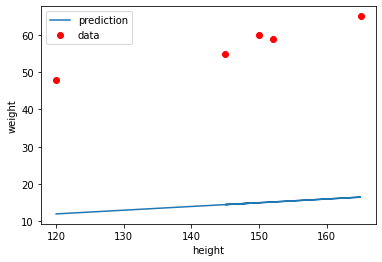

In [3]:
import numpy as np;
import math
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

# The data to "train" the model
weight = np.array([150,145,152,165,120]);
height = np.array([60, 55, 59, 65, 48]);

# Try one guess. Always good practice to take some initial guesses!! Try m = .5 and .1
m = .1;
predicted_height = m*weight;
plt.plot(weight, predicted_height, label = "prediction");
plt.plot(weight, height,'or', label = "data");
plt.xlabel("height");
plt.ylabel("weight");
plt.legend();




# We observe

We see that m = .1 is too low and 0.5 is a little too high to fit the data. So let's write a loop and test several more value of m. And this time, let's calculate our sum of squared error (SSE).

Text(0, 0.5, 'Sum of Squared Error')

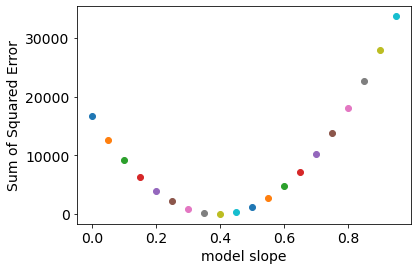

In [8]:
# Our model is w = m*h+b where b =0. Let's calculate our error for different values of m
for m in np.arange(0,1,.05):
    predicted_height = m*weight;
    err = predicted_height - height;
    SSE = np.sum(err**2);
    plt.plot(m, SSE,'o');
    
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("model slope")
plt.ylabel("Sum of Squared Error")

# Results

- We see very clearly that our SSE gets smaller as m goes from 0 to about m = 0.4
- After this value, we see the SSE begins to rise again, indicating poorer fit to the data
- This is a nutshell is how a regression solver will work!
    - All regression solvers use different strategies but most are based on the idea of using the derivative of the SSE to decide what values of parameters to test.
    - We'll cover gradient descent in some minor detail, but not higher algorithms

# Regression for Linear Models can be done easily with least squares

- To summarize the steps, you take your linear equation, plug it into the SSE equation, take the derivative of the SSE equation, set it equal to zero (which is the minimum!) and solve for your parameter.
- See any basic text for the derivation or <a href = "SLR_Leastsquares.pdf"> CLICK HERE</a> 


# Least squares calculation

- Assume a linear model $\vec{y} = \beta X$ where you have m pairs of output and input measurements such that 
    - y, the measured output, is m x 1 dimensions
    - X, the measured inputs to the model, has dimensions m x p. If including an intercept in the model, the first column of the X matrix should all be 1s. Otherwise, X is m x p.
    - And $\beta$ are the parameters to be estimated, p x 1.
- The value of the parameters that will minimize the SOS error cost function is: $\beta = (X^T X)^{-1}X^T \vec{y}$

In [10]:
# Need to make array matrices. This is for when there is an intercept
import numpy as np

X = np.c_[np.ones(5),weight]
print(X)

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ height
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)


# Need to make array matrices. This is for when there is NO intercept
X = np.c_[weight]
print(X)
tmp = inv(np.matmul(np.transpose(X),X))

SLOPE = tmp @ np.transpose(X) @ height
print("Our slope when we force the intercept to be zero = ",SLOPE)

[[  1. 150.]
 [  1. 145.]
 [  1. 152.]
 [  1. 165.]
 [  1. 120.]]
Our intercept is  2.1303709144318077 and our slope is 0.37752478883584417
[[150]
 [145]
 [152]
 [165]
 [120]]
Our slope when we force the intercept to be zero =  [0.39193009]


In [11]:
import statsmodels.api as sm
model = sm.OLS(height, sm.add_constant(weight)).fit()

# erase the add constant above to remove the intercept of the model.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     78.12
Date:                Mon, 12 Sep 2022   Prob (F-statistic):            0.00305
Time:                        13:34:08   Log-Likelihood:                -7.5345
No. Observations:                   5   AIC:                             19.07
Df Residuals:                       3   BIC:                             18.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1304      6.285      0.339      0.7

c:\Users\mdsnb\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Gradient Descent Regression

- Gradient descent is one of the easiest but still effective algorithms for fitting parameters.
- In a nutshell (I like this word today), gradient descent 
    - Takes a starting guess
    - Estimates the derivative of the **error function** with respect to the parameters
        - Mathematically $\frac{\partial{SSE}}{\partial{m}}$ in our simple example
        - A negative derivative means the error is getting smaller.
        - Sometimes, the derivative can be calculated by hand and used to speed up solver. But most often, the solver will approximate the derivative at each step (a la homework 4 solutions)
    - Uses the derivative to determine the "direction" to change the parameter value
        - In our example, should it make m more larger (move to the right) or smaller (move to the left)
    - Final decision: how big of a move to make in that direction
        - This is called the **learning rate**

Our best value for our slope is  0.38693009033581705  with SSE 8.896476931581063
0.39207650273224043


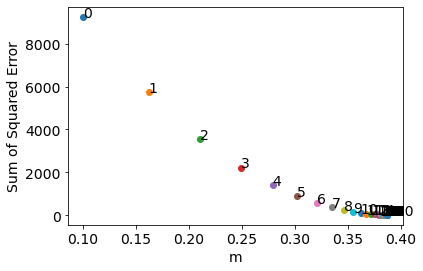

In [12]:


# First, we need to be able to approximate the derivative.
def SSE(m):
    predicted_height = m*weight;
    err = predicted_height - height;
    SSE = np.sum(err**2);
    return SSE;

def derivative(m):
    DERIVATIVE = (SSE(m+0.01)-SSE(m))/0.01;
    return DERIVATIVE

derivative(.4)

n = 0;
current_m = .1;
rate = 0.000001; # Try raising in very small increments, from 0.000001 to 0.00001

# Plot our initial guess' SSE and label zero
plt.plot(current_m, SSE(current_m),'o');
plt.text(current_m, SSE(current_m),n);

while n < 100:
    new_m = current_m - rate * derivative(current_m);
    current_m=new_m;
    # print(new_m);
    n = n + 1;
    plt.plot(new_m, SSE(new_m),'o');
    plt.text(new_m, SSE(new_m),n);
    
print("Our best value for our slope is ", new_m, " with SSE", SSE(new_m))
plt.xlabel("m");
plt.ylabel("Sum of Squared Error");

# FYI - for linear models like this, the best fit for m should simply be the ratio of the mean of the two measurements
m = np.mean(height)/np.mean(weight);
print(m)

# Observations from simple gradient descent algorithm

- It works for the correct values of the learning rate
    - Choosing a proper learning rate can be difficult. A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can lead to divergence
- Gradient descent can be used for linear or nonlinear systems. But typically, linear systems can be solved precisely (see below)
- Normalizing the data and/or the SSE can make selection of the learning rate a little more intuitive
- Most advanced regression algorithms have learning rate schedules or adaptive learning rate schemes built in 
- Lastly, two commons ways for deciding when the regression algorithm should stop searching is to define a maximum # of iterations or to set a minimum step size (i.e. the learning rate * derivative).

# KEY GUIDELINES for Regression

1. Always plot and analyze your data BEFORE attempting to train a model to it
    - The nature of your data will determine if the model is correct
    - **Probably the most common mistake people make**
    - Always consider normalized data (we'll discuss more later)
2. Always analyze and understand the model
    - We used a very simple model here but will show more complex ones soon.
    - Often we can infer good estimates on some parameters without training. The fewer number of parameters or the better the initial guesses you make, the more likely you can train a model
3. Very common for regression to fail for even mildly complex models
    - Simple models (linear models, neural nets) will almost always train to data. They might not give great predictions but they will converge and give estimates
    - But regression applied to complex models will very often fail to converge :-(
    - Adressing failed convergence is about 90% of my lab's work